In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf,pacf
%matplotlib inline


In [140]:
df = pd.read_csv('P2training.csv',header=0)
df.tail()
Date = pd.to_datetime(df.Date)
JPY = df['JPY/USD']

In [233]:
dfJPY = df[['Date','JPY/USD']]
#df.rename(columns={'JPY/USD':'JPYUSD'},inplace=True)
dfJPY.Date = pd.to_datetime(dfJPY.Date)
dfJPY.set_index('Date',inplace=True, drop=True)
ldfJPY = np.log(dfJPY)
dfJPY.columns=['JPY']
dfJPY.head()

,JPY
Date,
1979-12-31,240.30
1980-01-02,238.45
1980-01-03,238.35
1980-01-04,234.80
1980-01-07,231.55


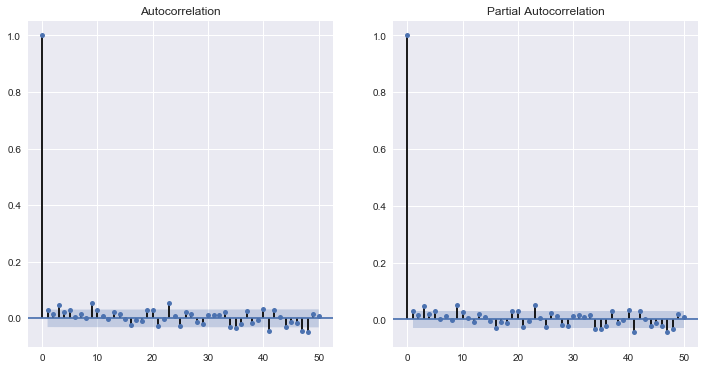

In [262]:
#ARIMA
import statsmodels.graphics.tsaplots as sgt
alpha = 0.05
lags = 50
data = dfJPY - dfJPY.shift(1)
data.dropna(inplace=True)
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(data, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(data, ax=ax[1], lags=lags, alpha=alpha, method='ols')

In [267]:
from statsmodels.tsa.arima_model import ARIMA
# initial fit of the model without seasonal component
model2 = ARIMA(data, order=(1, 1, 0))  
results_ns = model2.fit(disp=-1) 
print(results_ns.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.JPY   No. Observations:                 4018
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6281.257
Method:                       css-mle   S.D. of innovations              1.155
Date:                Sat, 18 Nov 2017   AIC                          12568.514
Time:                        22:14:33   BIC                          12587.409
Sample:                    01-02-1980   HQIC                         12575.210
                         - 12-29-1995                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0341      0.019     -1.813      0.070      -0.071       0.003
ar.L1.D.JPY     0.0311      0.016      1.973      0.049       0.000       0.062
                                    Roots       

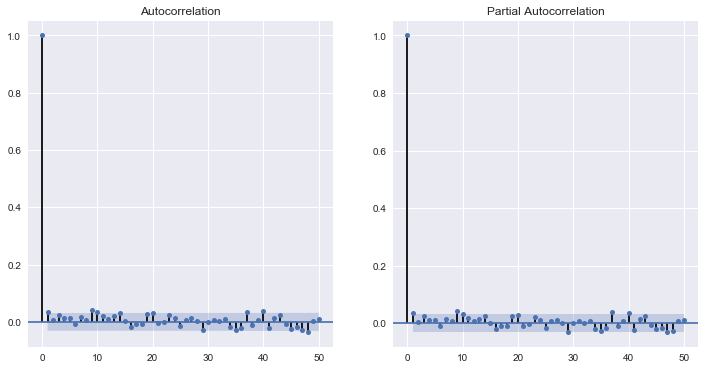

In [239]:
#ARIMA
import statsmodels.graphics.tsaplots as sgt
alpha = 0.05
lags = 50
data = ldfJPY - ldfJPY.shift(1)
data.dropna(inplace=True)
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(data, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(data, ax=ax[1], lags=lags, alpha=alpha, method='ols')

In [230]:
from statsmodels.tsa.arima_model import ARIMA
# initial fit of the model without seasonal component
model = ARIMA(data, order=(9, 1, 0))  
results_ns = model.fit(disp=-1) 
print(results_ns.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.JPY/USD   No. Observations:                 4017
Model:                 ARIMA(9, 1, 0)   Log Likelihood               14305.418
Method:                       css-mle   S.D. of innovations              0.007
Date:                Sat, 18 Nov 2017   AIC                         -28588.836
Time:                        21:41:29   BIC                         -28519.555
Sample:                    01-03-1980   HQIC                        -28564.283
                         - 12-29-1995                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.255e-06   1.95e-05      0.064      0.949   -3.69e-05    3.95e-05
ar.L1.D.JPY/USD    -0.8822      0.016    -56.278      0.000      -0.913      -0.851
ar.L2.D.JPY/USD    -0.7942      

In [217]:
from statsmodels.tsa.arima_model import ARIMA
# initial fit of the model without seasonal component
data = dfJPY - dfJPY.shift(1)
data.dropna(inplace=True)
model = ARIMA(data, order=(1, 1, 0))  
results_ns = model.fit(disp=-1) 
print(results_ns.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.JPY   No. Observations:                 4017
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -7054.366
Method:                       css-mle   S.D. of innovations              1.401
Date:                Sat, 18 Nov 2017   AIC                          14114.731
Time:                        21:27:43   BIC                          14133.626
Sample:                    01-03-1980   HQIC                         14121.427
                         - 12-29-1995                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.015      0.026      0.979      -0.029       0.029
ar.L1.D.JPY    -0.4917      0.014    -35.790      0.000      -0.519      -0.465
                                    Roots       

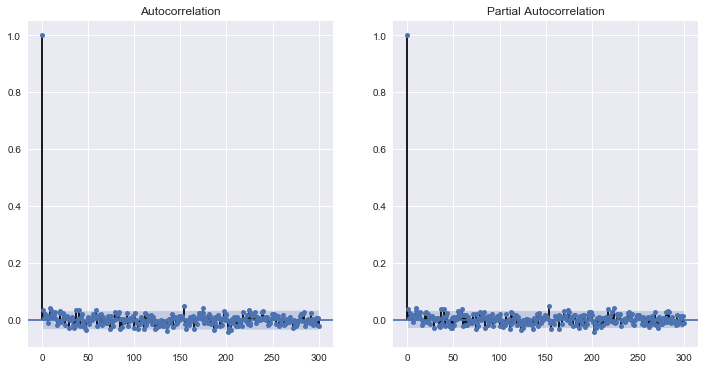

In [204]:
#SARIMA
import statsmodels.graphics.tsaplots as sgt
alpha = 0.05
lags = 300
data = ldfJPY - ldfJPY.shift(1)
data.dropna(inplace=True)
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(data, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(data, ax=ax[1], lags=lags, alpha=alpha, method='ols')

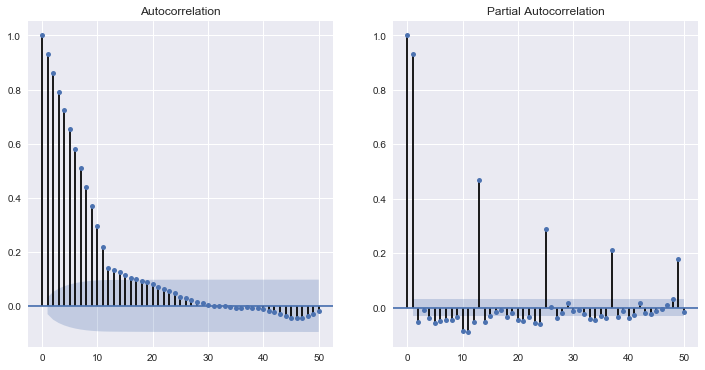

In [268]:
#SARIMA
import statsmodels.graphics.tsaplots as sgt
alpha = 0.05
lags = 50
data = ldfJPY - ldfJPY.shift(12)
data.dropna(inplace=True)
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(data, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(data, ax=ax[1], lags=lags, alpha=alpha, method='ols')

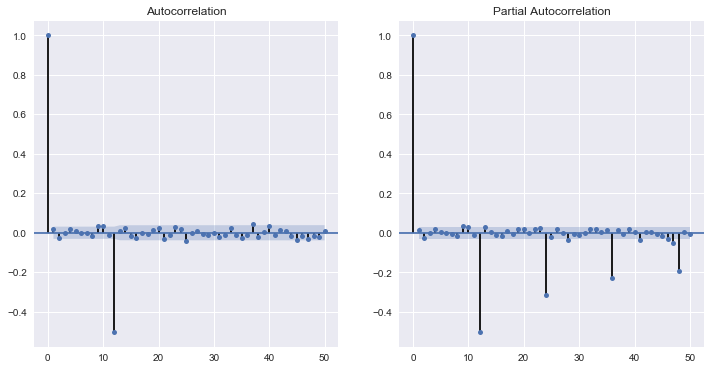

In [210]:
# after regular and seasonal differencing
rsdata = ldfJPY - ldfJPY.shift(1) -(ldfJPY.shift(12) - ldfJPY.shift(13))
rsdata.dropna(inplace=True)

alpha = 0.05
lags = 50
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(rsdata, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(rsdata, ax=ax[1], lags=lags, alpha=alpha, method='ols')

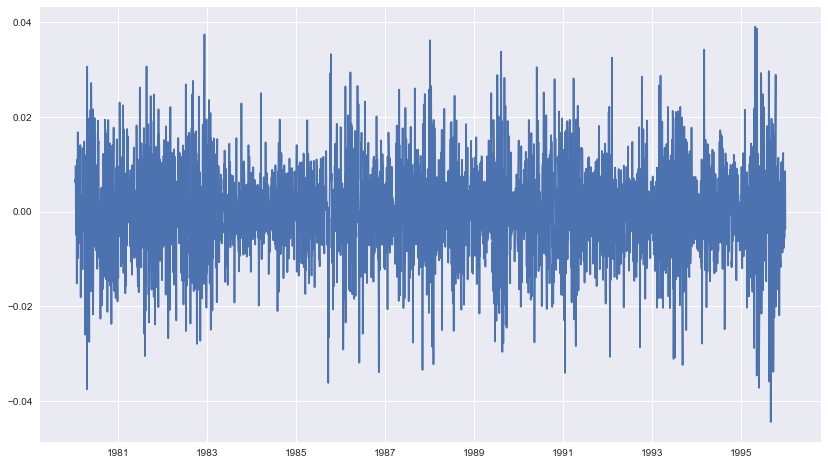

In [205]:
data = ldfJPY - ldfJPY.shift(1) -(ldfJPY.shift(12) - ldfJPY.shift(13))
fig =plt.figure(figsize=(14,8))
plt.plot(data)

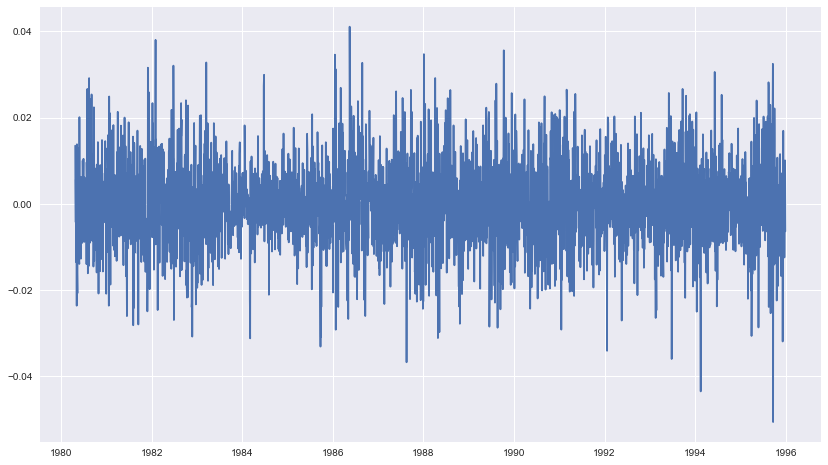

In [157]:
data = ldfJPY - ldfJPY.shift(1) -(ldfJPY.shift(79) - ldfJPY.shift(80))
fig =plt.figure(figsize=(14,8))
plt.plot(data)

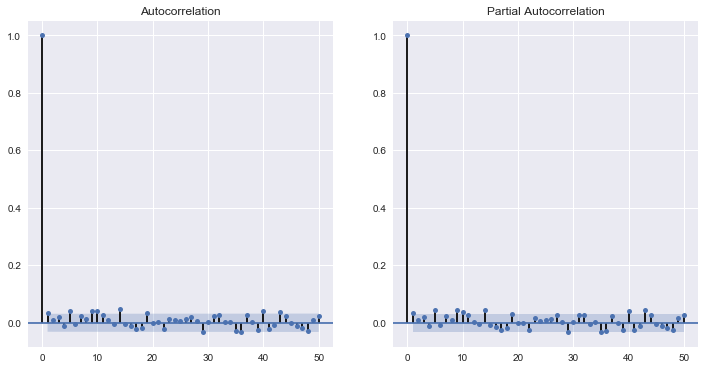

In [159]:
# after regular and seasonal differencing
rsdata = ldfJPY - ldfJPY.shift(1) -(ldfJPY.shift(79) - ldfJPY.shift(80))
rsdata.dropna(inplace=True)

alpha = 0.05
lags = 50
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(rsdata, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(rsdata, ax=ax[1], lags=lags, alpha=alpha, method='ols')

In [160]:
import statsmodels.api as sm
modelrs = sm.tsa.SARIMAX(rsdata, trend='n', order=(1,1,1), seasonal_order=(1,1,1,79))#,simple_differencing=True)
result_rs = modelrs.fit()
print(result_rs.summary())

/Users/williammeng/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                            JPY/USD   No. Observations:                 3939
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 79)   Log Likelihood               12893.891
Date:                            Sat, 18 Nov 2017   AIC                         -25777.783
Time:                                    20:00:56   BIC                         -25746.389
Sample:                                04-24-1980   HQIC                        -25766.646
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0458      0.015      3.104      0.002       0.017       0.075
ma.L1         -0.9948      0.002   

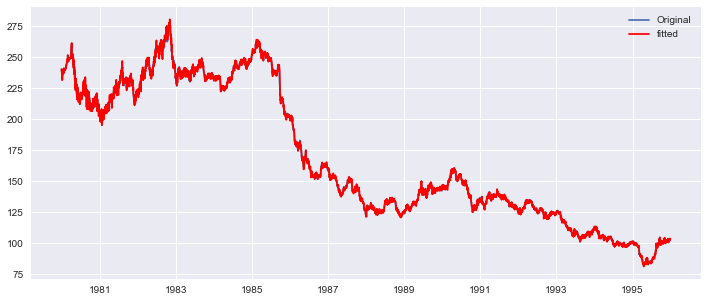

In [189]:
# map the prediction in the original space
L=79;
predrs = ldfJPY.copy();
predrs.loc[data.index,'JPY/USD'] = result_rs.fittedvalues
# the first few samples are used as initial values
allday = predrs.index;
for day in data.index:
    # get the index of the day
    idx = allday.get_loc(day);
    predrs.iloc[idx] = predrs.iloc[idx] + ldfJPY.iloc[idx-1] + ldfJPY.iloc[idx-L] - ldfJPY.iloc[idx-L-1];
    #predrs.iloc[idx] = np.exp(predrs.iloc[idx])
predrsl = np.exp(predrs)
fig = plt.figure(figsize=(12,5))
plt.plot(dfJPY, label='Original')
plt.plot(predrsl, color='red', label='fitted')
plt.legend(loc='best')

In [197]:
diff =dfJPY.JPY - predrsl['JPY/USD']
SSE = (diff**2).sum()
print SSE

10061.430094


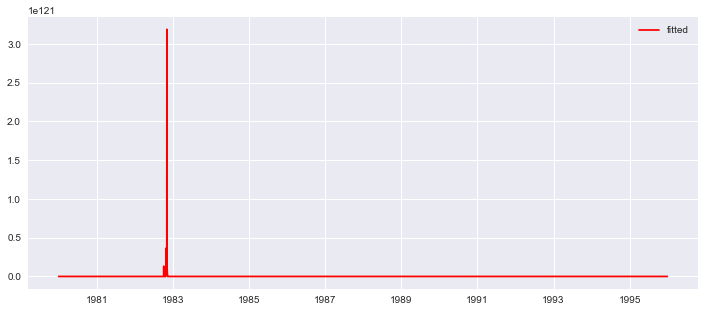

In [185]:
diff2 = 
SSE = (diff**2).sum()
print SSE


#calculate AIC
n=len(dfJPY)-65
AIC = n*np.log(SSE/n)+2*(2)
print AIC

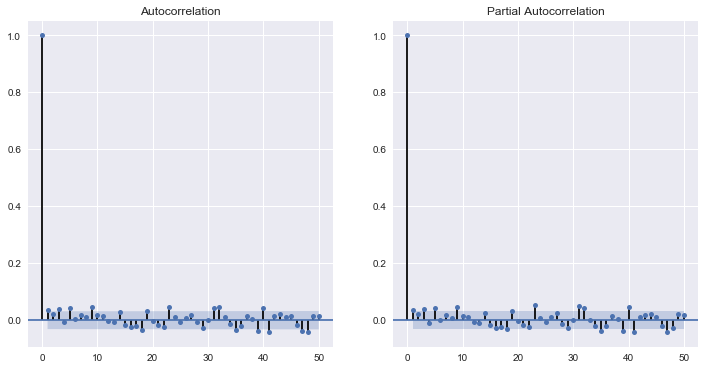

In [88]:
data = dfJPY - dfJPY.shift(1) - (dfJPY.shift(79) - dfJPY.shift(80))
data.dropna(inplace=True)
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(data, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(data, ax=ax[1], lags=lags, alpha=alpha, method='ols')

In [24]:
import statsmodels.api as sm
model = sm.tsa.SARIMAX(dfJPY, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12))#,simple_differencing=True)
result_sm = model.fit()
print(result_sm.summary())


                                 Statespace Model Results                                 
Dep. Variable:                            JPY/USD   No. Observations:                 4019
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6298.401
Date:                            Thu, 16 Nov 2017   AIC                          12606.803
Time:                                    12:17:19   BIC                          12638.297
Sample:                                12-31-1979   HQIC                         12617.964
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9880      0.009   -110.553      0.000      -1.006      -0.971
ma.L1          0.9933      0.007   

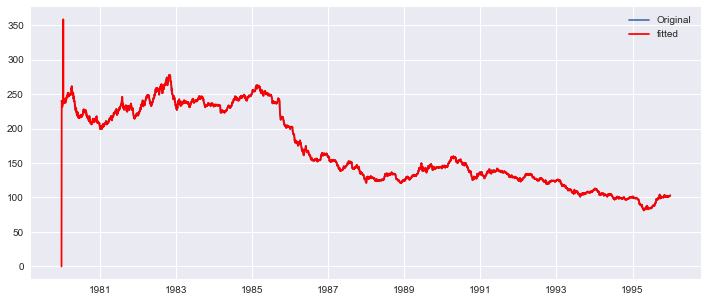

In [26]:
fitval = result_sm.fittedvalues

fig = plt.figure(figsize=(12,5))
plt.plot(dfJPY, label='Original')
plt.plot(fitval, color='red', label='fitted')
plt.legend(loc='best')


In [59]:
dffitval = pd.DataFrame(fitval,columns=['data'])
dffitval = dffitval[1:len(dffitval)]
#dfJPY = dfJPY[1:len(dfJPY)]
#diff = dffitval['data'] - dfJPY['JPY/USD']
print (diff.values**2).sum()

19602.5091546


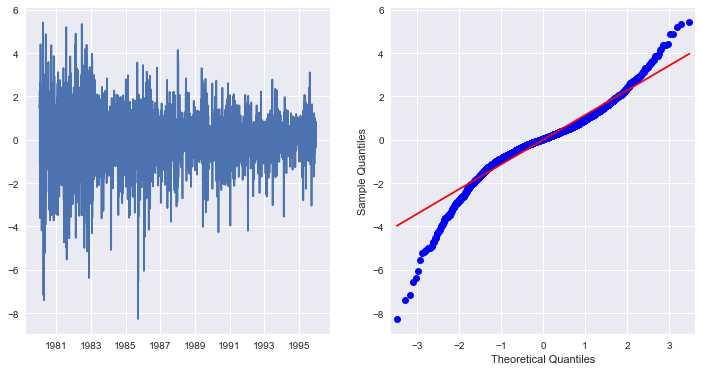

In [16]:
import scipy.stats as stats
res = result_sm.resid
res = res[13:,]

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(res)
fig = sm.qqplot(res, stats.distributions.norm, line='r', ax=ax[1]) 

In [70]:
import statsmodels.api as sm
model = sm.tsa.SARIMAX(dfJPY, trend='n', order=(1,1,1), seasonal_order=(1,1,1,60),enforce_stationarity=False,enforce_invertibility=False)
result_sm = model.fit()
print(result_sm.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            JPY/USD   No. Observations:                 4019
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 60)   Log Likelihood               -6118.164
Date:                            Thu, 16 Nov 2017   AIC                          12246.328
Time:                                    12:59:19   BIC                          12277.822
Sample:                                12-31-1979   HQIC                         12257.489
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1425      0.438     -0.325      0.745      -1.001       0.716
ma.L1          5.9904     15.674   

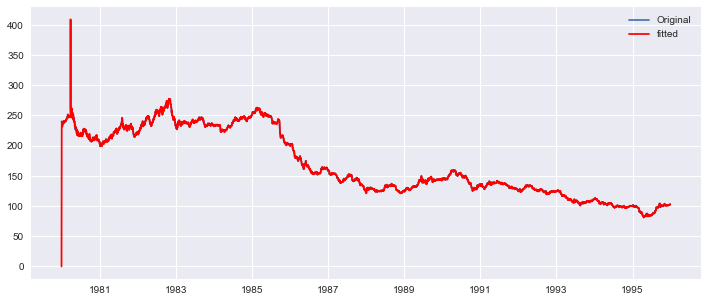

In [71]:
fitval = result_sm.fittedvalues

fig = plt.figure(figsize=(12,5))
plt.plot(dfJPY, label='Original')
plt.plot(fitval, color='red', label='fitted')
plt.legend(loc='best')

In [77]:
dffitval = pd.DataFrame(fitval,columns=['data'])
diff = dfJPY['JPY'] - dffitval['data']
print (diff.values**2).sum()

89456.0967318


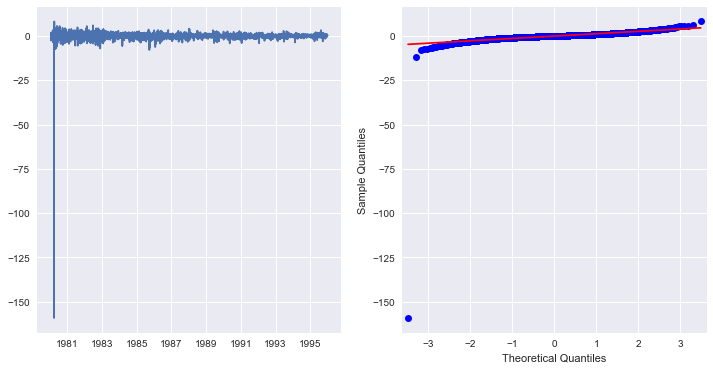

In [72]:
import scipy.stats as stats
res = result_sm.resid
res = res[13:,]

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(res)
fig = sm.qqplot(res, stats.distributions.norm, line='r', ax=ax[1]) 

In [78]:
import statsmodels.api as sm
ldfJPY = np.log(dfJPY)
model2 = sm.tsa.SARIMAX(ldfJPY, trend='n', order=(1,1,1), seasonal_order=(1,1,1,60),enforce_stationarity=False,enforce_invertibility=False)
result_sm2 = model2.fit()
print(result_sm2.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            JPY/USD   No. Observations:                 4019
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 60)   Log Likelihood               13876.546
Date:                            Thu, 16 Nov 2017   AIC                         -27743.093
Time:                                    18:08:31   BIC                         -27711.599
Sample:                                12-31-1979   HQIC                        -27731.931
                                     - 12-29-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7996      0.146     -5.471      0.000      -1.086      -0.513
ma.L1          1.2193      0.208   

42173343.7193
36676.6221092


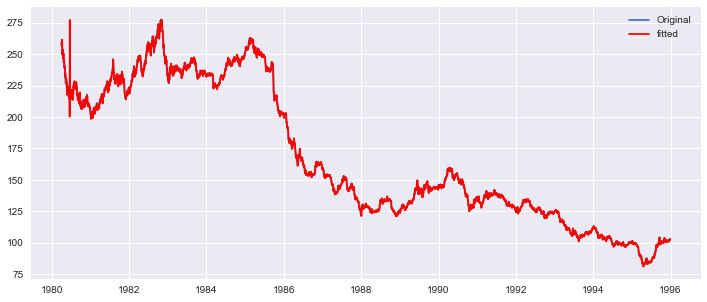

In [155]:
fitval = result_sm2.fittedvalues
fitval2 = np.exp(fitval)
fig = plt.figure(figsize=(12,5))
plt.plot(dfJPY[65:len(dfJPY)], label='Original')
plt.plot(fitval2[65:len(dfJPY)], color='red', label='fitted')
plt.legend(loc='best')
diff = pd.Series(dfJPY.JPY) - fitval2
SSE = (diff**2).sum()
print SSE


#calculate AIC
n=len(dfJPY)-65
AIC = n*np.log(SSE/n)+2*(2)
print AIC

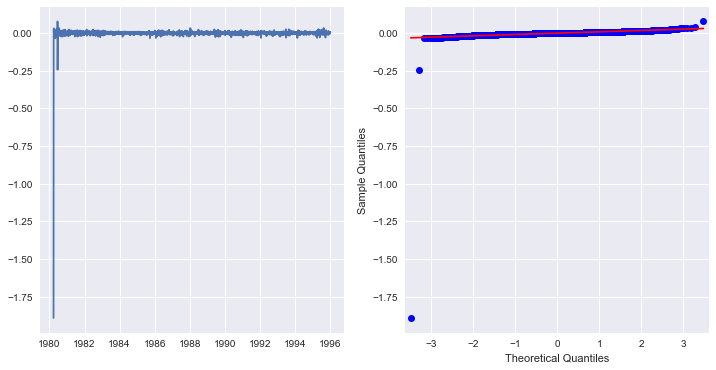

In [269]:
import scipy.stats as stats
res = result_sm2.resid
res = res[61:,]

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(res)
fig = sm.qqplot(res, stats.distributions.norm, line='r', ax=ax[1]) 